# Задача 1

Решить дифференциальное уравнение явным методом Эйлера и явным
методом Рунге-Кутты 4 порядка. Cравнить результаты. Сделать выводы.

$$\frac{du}{dt} = -sin(u), 0 < t < 4 \pi$$
$$u(0) = 1$$

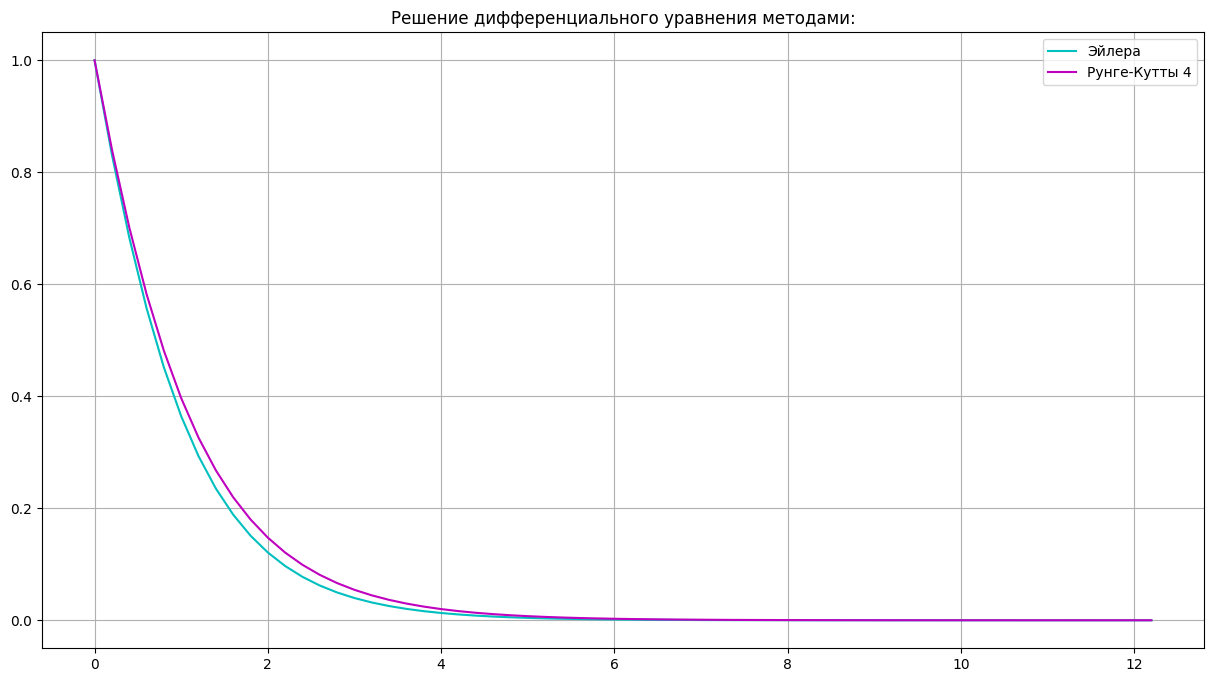

In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt
import sympy as sp

NewtonArgValues      = np.arange(0, 1.1, 0.1)
NewtonFunctionValues = [1, 0.8, 0.5, 0.307, 0.2, 0.137, 0.1, 0.075, 0.06, 0.047, 0.039]

def getDerivative(U : float) -> float:
    # Возвращает производную искомой функции u из задания
    return -math.sin(U)

def getStartCoord() -> float:
    # Начальное значение задачи Коши
    return 1
    
def calculateRungeKuttaTrajectory(StartCoord : float, Start: float, Stop: float, DeltaT: float) -> list:
    # Рассчитывает траекторию методом Рунге-Кутты 4
    Trajectory = []
    K0 = StartCoord
    NumPoints = int((Stop - Start) / DeltaT)
    for Point in range(NumPoints):
        D1 = getDerivative(K0)
        D2 = getDerivative(K0 + DeltaT / 2 * D1)
        D3 = getDerivative(K0 + DeltaT / 2 * D2)
        D4 = getDerivative(K0 + DeltaT * D3)
        K1 = K0 + DeltaT / 6 * (D1 + 2 * D2 + 2 * D3 + D4)
        Trajectory.append(K0)
        K0 = K1
    return Trajectory
        
def calculateEilerTrajectory(StartCoord : float, Start: float, Stop: float, DeltaT: float) -> list:
    # Рассчитывает траекторию явным методом Эйлера
    Trajectory = []
    K0 = StartCoord
    NumPoints = int((Stop - Start) / DeltaT)
    for Point in range(NumPoints):
        K1 = K0 + DeltaT * getDerivative(K0)
        Trajectory.append(K0)
        K0 = K1;
    return Trajectory

    
def main():
    plt.figure(figsize = (15, 8))
    plt.title("Решение дифференциального уравнения методами:")

    Start = 0
    Stop = 4 * math.pi
    DeltaT = 0.2

    Args = np.arange(Start, Stop - DeltaT, DeltaT)
    EilerVals = calculateEilerTrajectory(getStartCoord(), Start, Stop, DeltaT)
    plt.plot(Args, EilerVals, 'c', label = "Эйлера")
    RungeKuttaVals = calculateRungeKuttaTrajectory(getStartCoord(), Start, Stop, DeltaT)
    plt.plot(Args, RungeKuttaVals, 'm', label = "Рунге-Кутты 4")
    
    plt.legend()
    plt.grid()
    plt.show()

if __name__ == '__main__':
    main()